# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
for column in df.columns:
    dist_values = len(df[column].unique())
    print(f"{column}: {dist_values} distinct values")

CustomerID: 200 distinct values
Genre: 2 distinct values
Age: 51 distinct values
Annual Income (k$): 64 distinct values
Spending Score (1-100): 84 distinct values


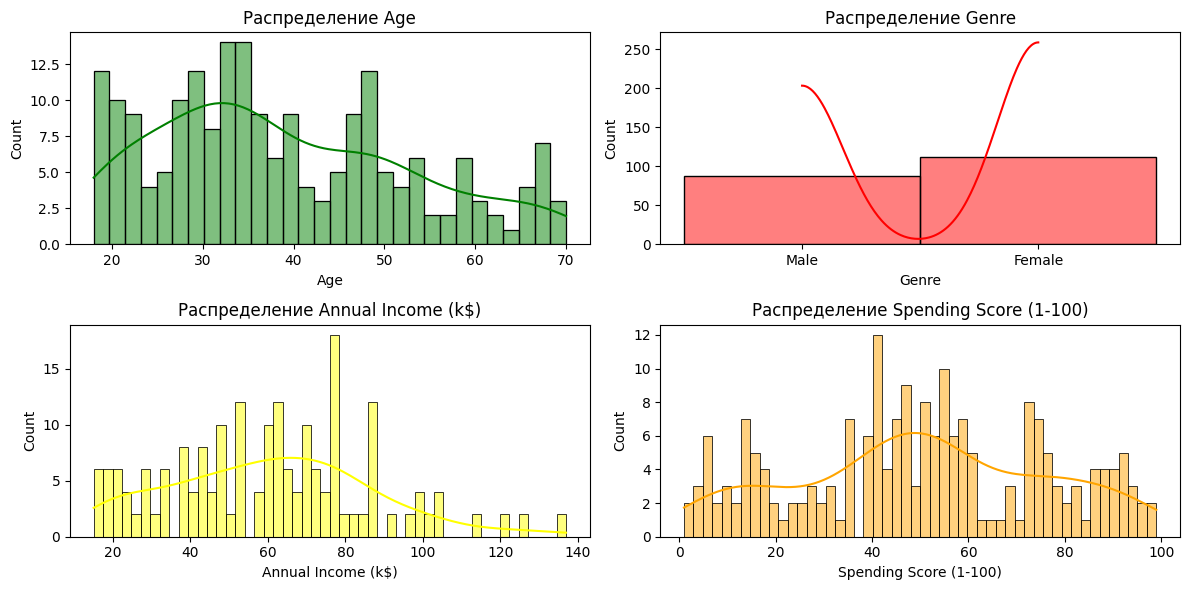

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Распределение Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Genre'], bins=50, kde=True, color='red')
plt.title('Распределение Genre')

plt.subplot(2, 2, 3)
sns.histplot(df['Annual Income (k$)'], bins=50, kde=True, color='yellow')
plt.title('Распределение Annual Income (k$)')

plt.subplot(2, 2, 4)
sns.histplot(df['Spending Score (1-100)'], bins=50, kde=True, color='orange')
plt.title('Распределение Spending Score (1-100)')

plt.tight_layout()
plt.show()


In [7]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


Выбросов и пропущенных значений не наблюдаем

Выбросов по признаку Spending Score не наблюдаем

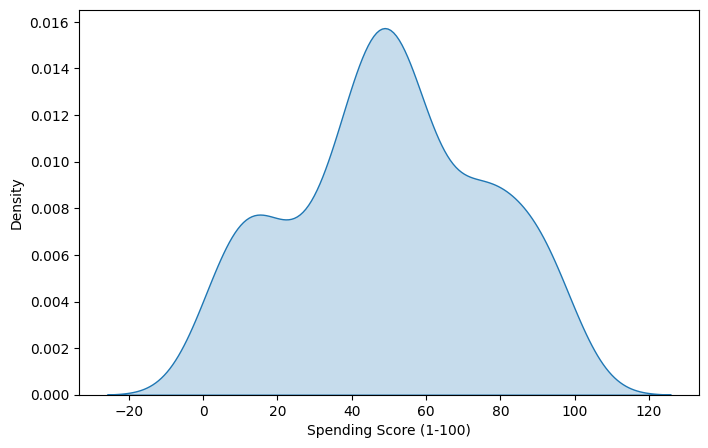

In [8]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Spending Score (1-100)'], fill=True);

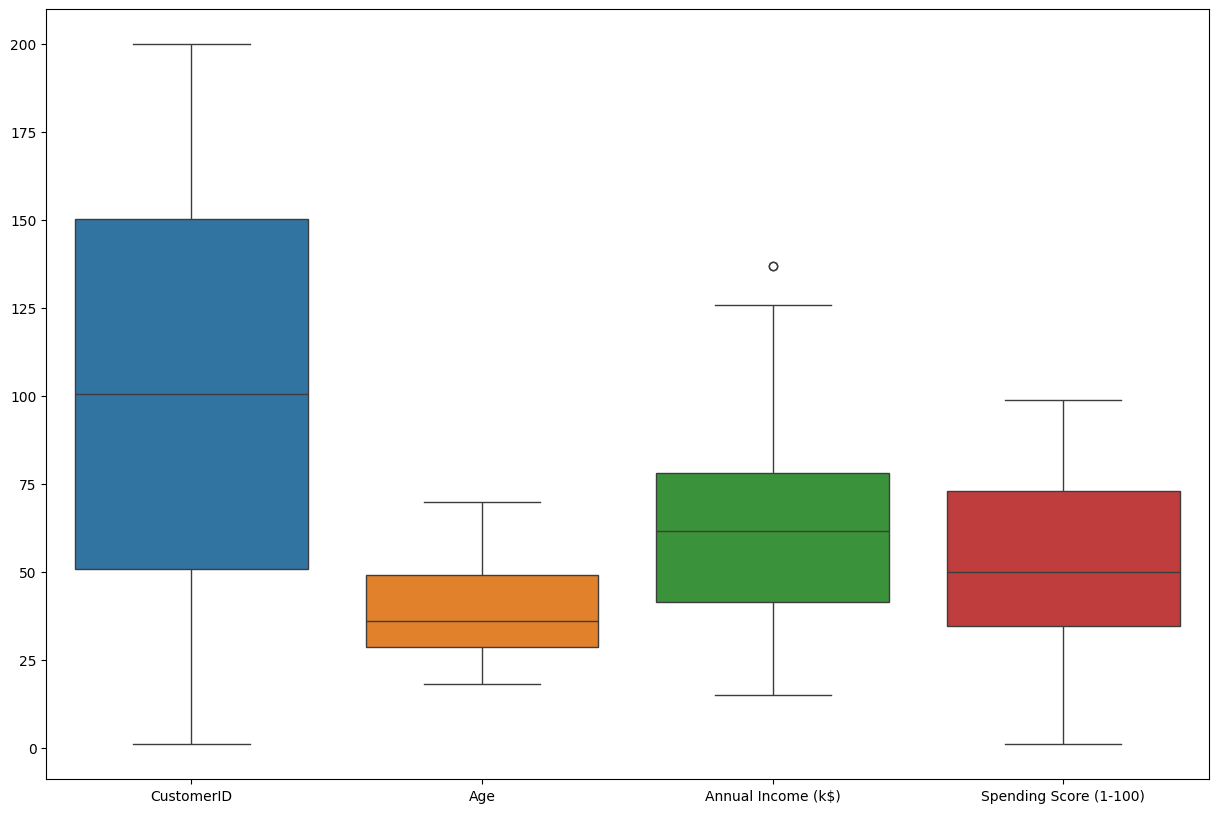

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax)
plt.show()

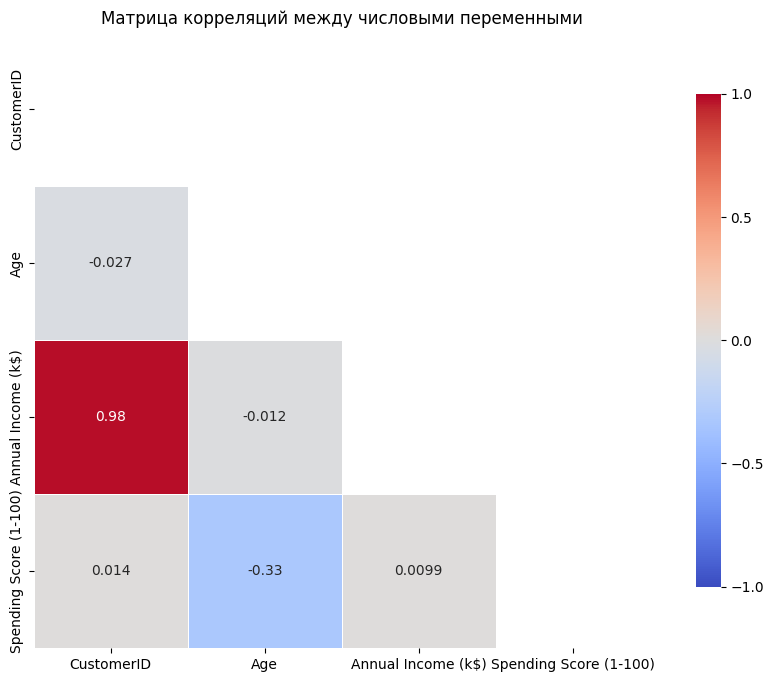

In [10]:
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

Количество признаков не большое, попробуем выбрать количество клдасторов с помощью визуализации

Сначала преобразуем категориальный признак Genre в численный

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
l = LabelEncoder()
df['Genre'] = l.fit_transform(df['Genre'])

In [13]:
df['Genre'].value_counts(sort = False)

,count
Genre,
1,88
0,112


In [14]:
import plotly.express as px

Построим 3d модели распределения наших данных:

С градиентом по целевому признаку Spending Score (1-100) с координатами по осям-признакам Genre, Age, Annual Income (k$)

In [15]:
fig = px.scatter_3d(df, x='Genre', y='Age', z='Annual Income (k$)',
              color='Spending Score (1-100)')
fig.show()

Не видим принципиальной разницы цdетового распределния при разном значении показателя Genre, в связи с чем строим 3d модель со значением целевого показателя по шкале z =Spending Score (1-100) с координатами x,y по осям Age, Annual Income (k$)

In [16]:
fig = px.scatter_3d(df, x='Annual Income (k$)', y='Age', z='Spending Score (1-100)')
fig.show()

Визуально наблюдаем 5 областей-скоплений точек, в связи с чем предполагаем наличие 5 кластеров

### Задание 3

Преобразуйте категориальный признак Genre в численный.

Сделано выше

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

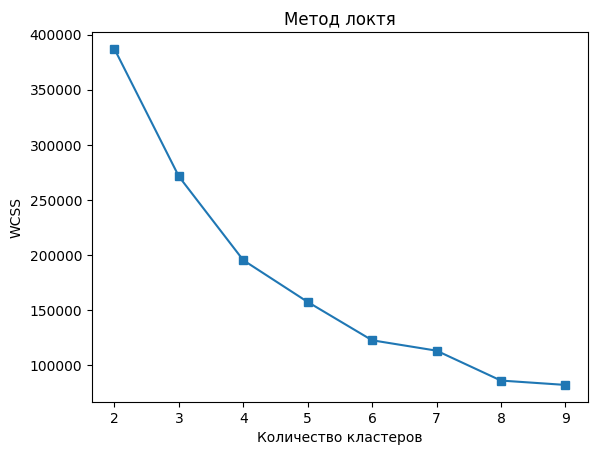

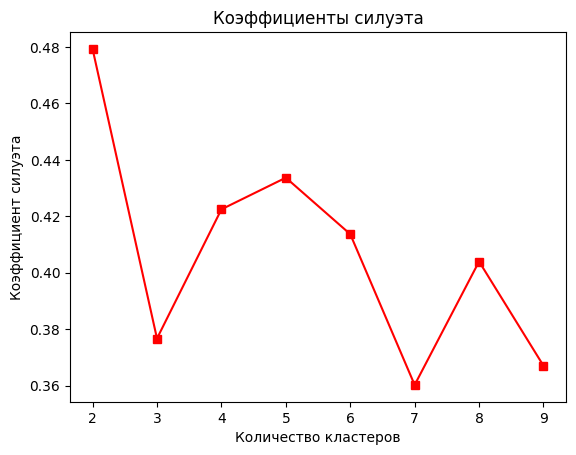

In [18]:
n_clusters = list(range(2, 10))
metrics = []
sil = []

for k in n_clusters:
  km = KMeans(n_clusters=k, random_state=42).fit(df)
  metrics.append(km.inertia_)
  sil.append(silhouette_score(df, km.labels_, metric='euclidean'))


plt.plot(n_clusters, metrics, marker = 's')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS');
plt.show()

plt.plot(n_clusters, sil, marker = 's', c='r')
plt.title('Коэффициенты силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта');
plt.show()



Метод локтя не дает однозначного ответа при числе кластеров от 3 до 6. Коэфициент силуэта, характеризующий качество кластеризации при отсуствии проверочной выборки, на локальном максимуме при k = 5. Выбираем k = 5, визуализируем итоги кластеризации

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [19]:
km = KMeans(n_clusters=5, random_state=42).fit(df)


In [20]:
silhouette_score(df, km.labels_, metric='euclidean')

0.4336704604654853

In [21]:
cluster_labels = km.labels_
fig = px.scatter_3d(df, x='Annual Income (k$)', y='Age', z='Spending Score (1-100)', color=cluster_labels)
fig.show()

# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* АP — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [22]:
df1 = pd.read_csv('gt_2015.csv')
df1.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


AT: mu = 17.23, sigma = 8.10
AT: Skewness: -0.12
AT: Kurtosis: -0.68


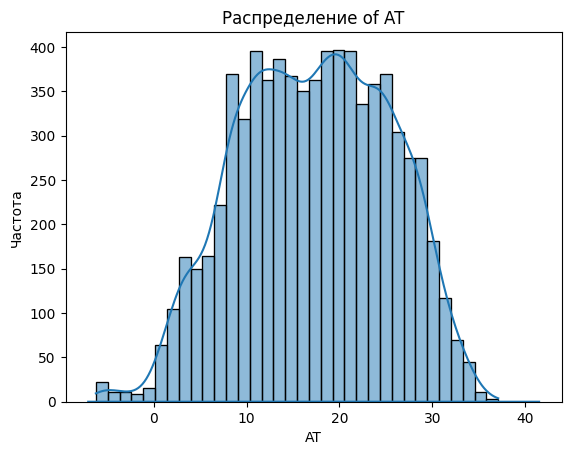

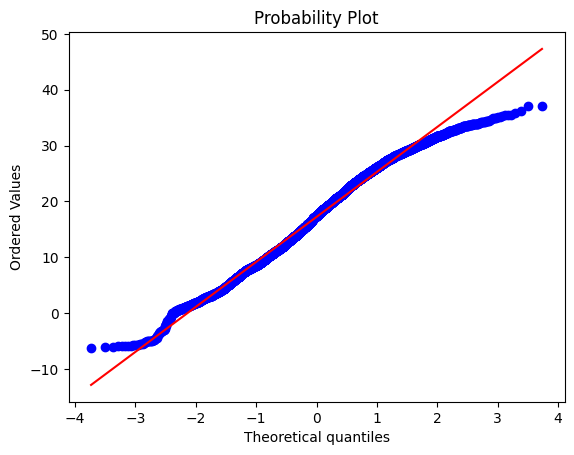

AP: mu = 1014.51, sigma = 6.89
AP: Skewness: 0.39
AP: Kurtosis: 0.55


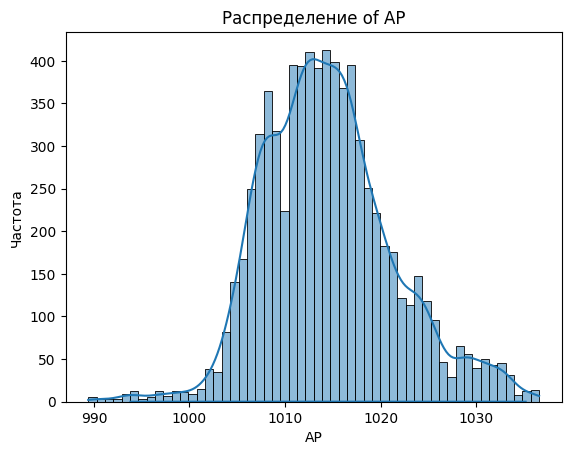

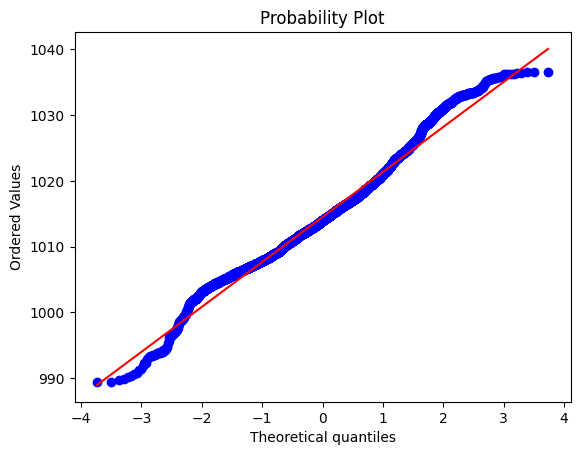

AH: mu = 68.65, sigma = 13.54
AH: Skewness: -0.54
AH: Kurtosis: -0.47


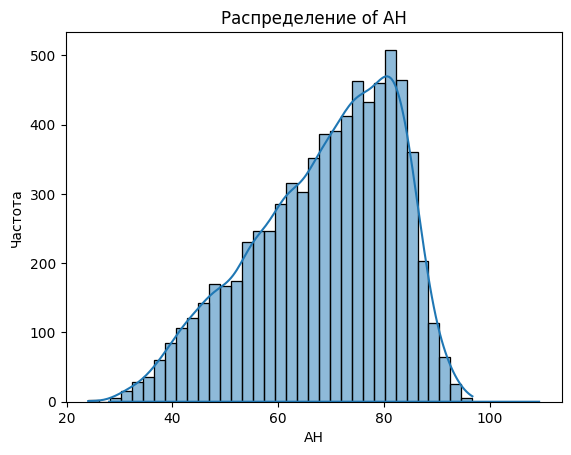

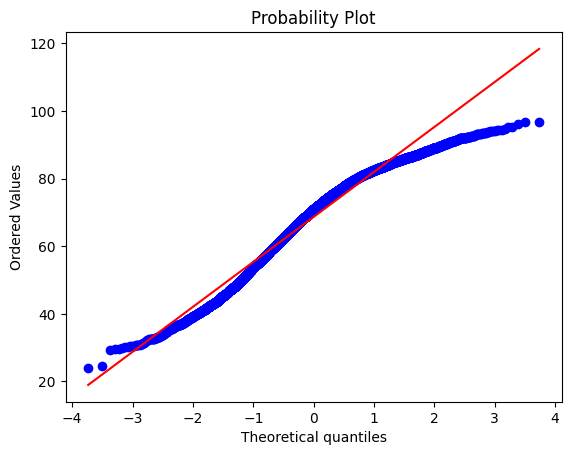

AFDP: mu = 3.60, sigma = 0.61
AFDP: Skewness: 0.02
AFDP: Kurtosis: -1.16


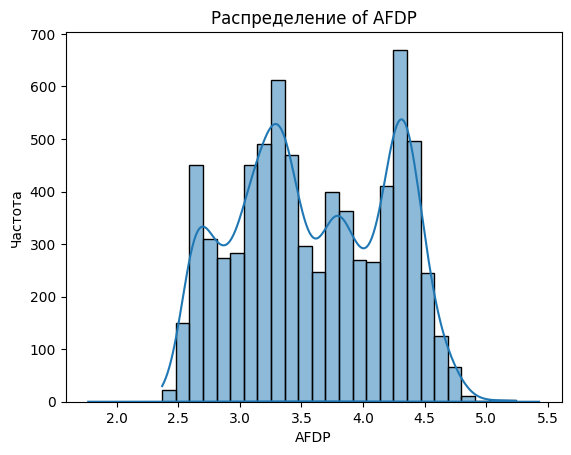

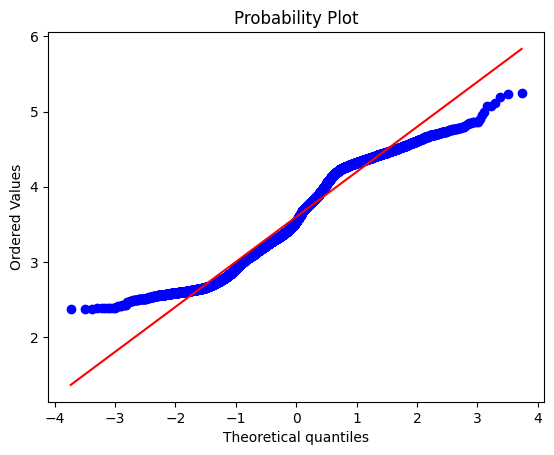

GTEP: mu = 26.13, sigma = 4.47
GTEP: Skewness: 0.11
GTEP: Kurtosis: -0.84


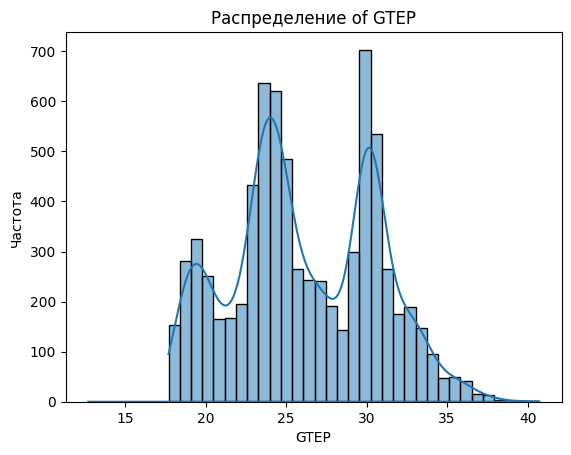

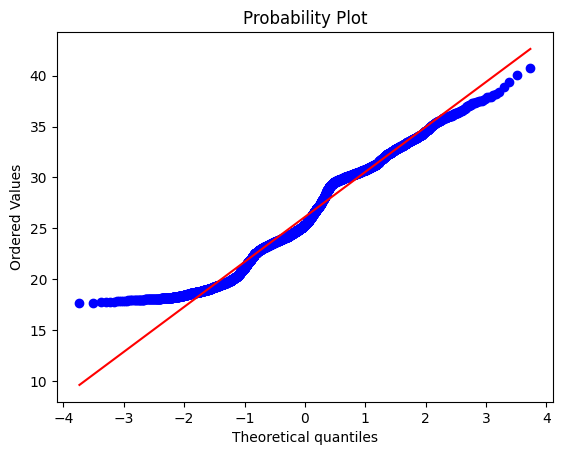

TIT: mu = 1078.97, sigma = 19.76
TIT: Skewness: -0.70
TIT: Kurtosis: -0.44


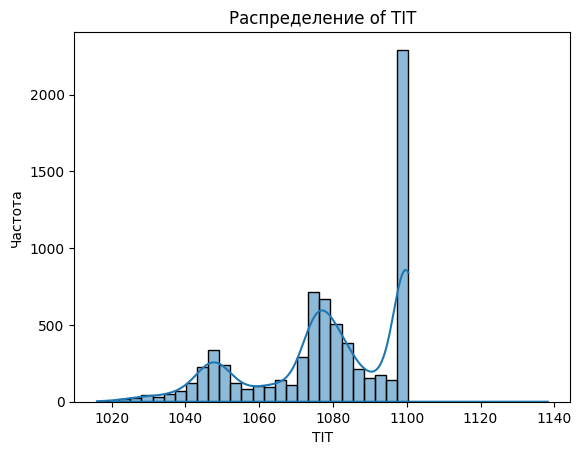

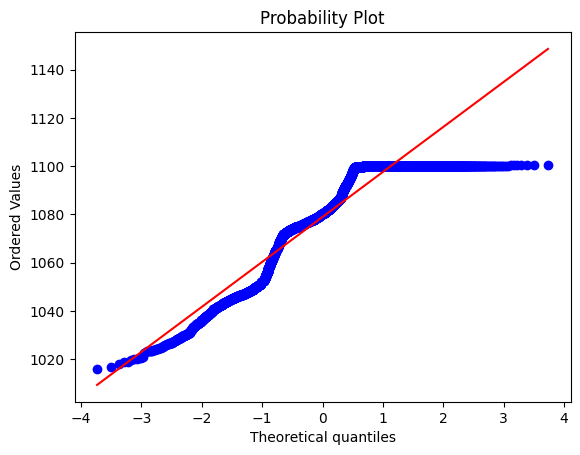

TAT: mu = 546.64, sigma = 5.49
TAT: Skewness: -1.92
TAT: Kurtosis: 3.44


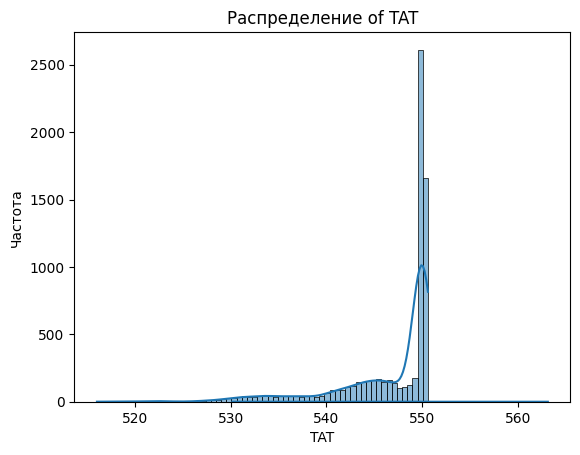

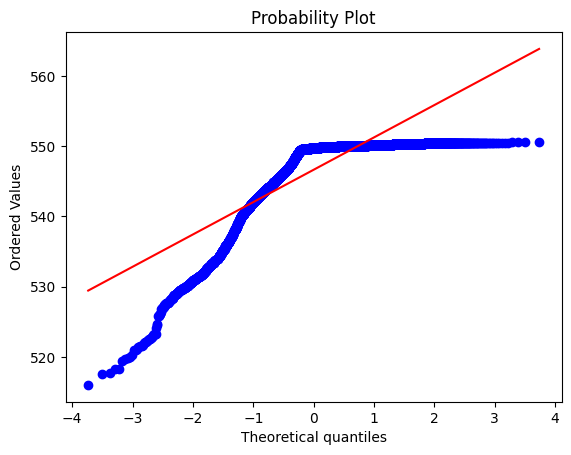

TEY: mu = 133.99, sigma = 16.18
TEY: Skewness: -0.05
TEY: Kurtosis: -0.60


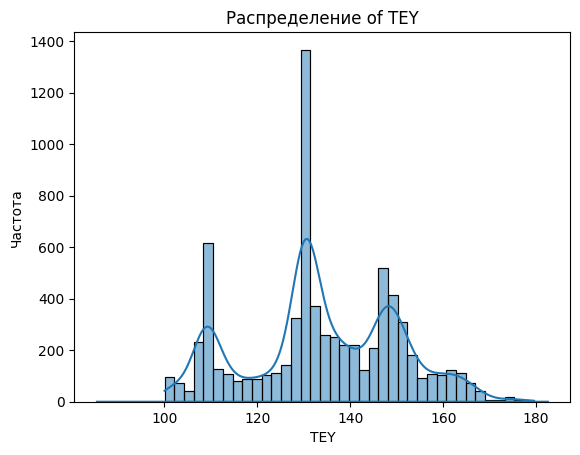

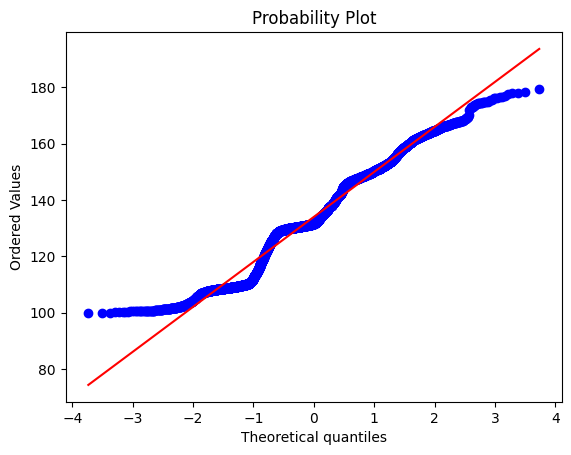

CDP: mu = 12.10, sigma = 1.14
CDP: Skewness: 0.06
CDP: Kurtosis: -0.87


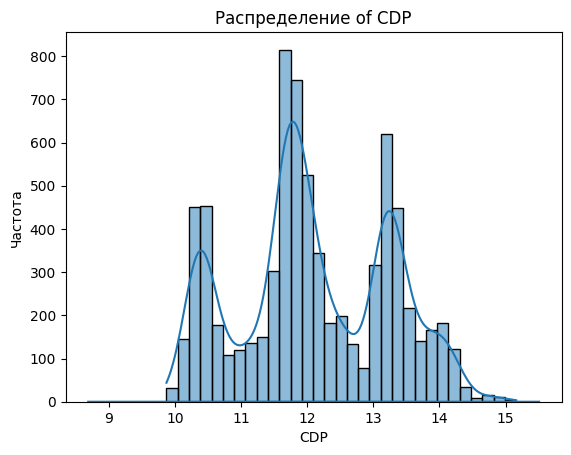

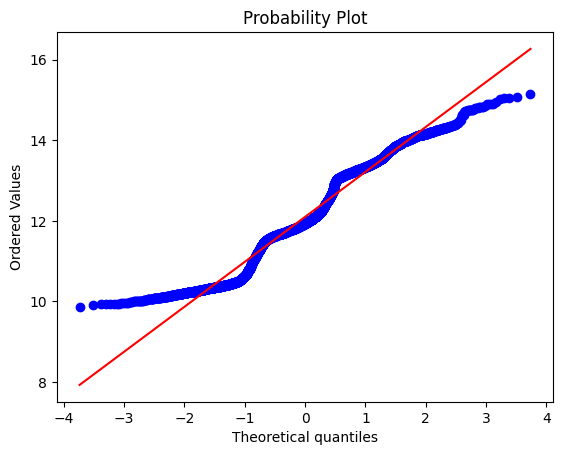

CO: mu = 3.13, sigma = 2.23
CO: Skewness: 3.95
CO: Kurtosis: 34.32


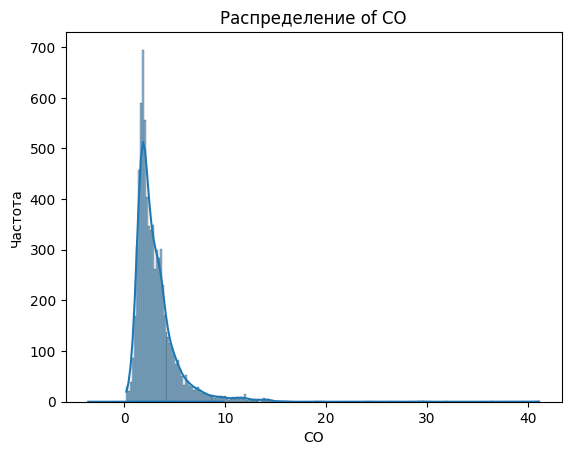

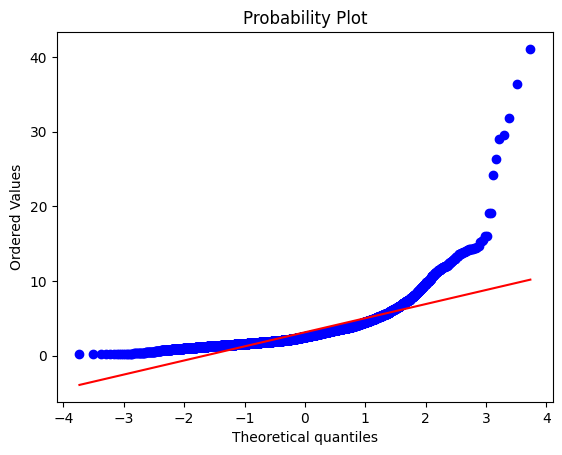

NOX: mu = 59.89, sigma = 11.13
NOX: Skewness: 1.62
NOX: Kurtosis: 3.84


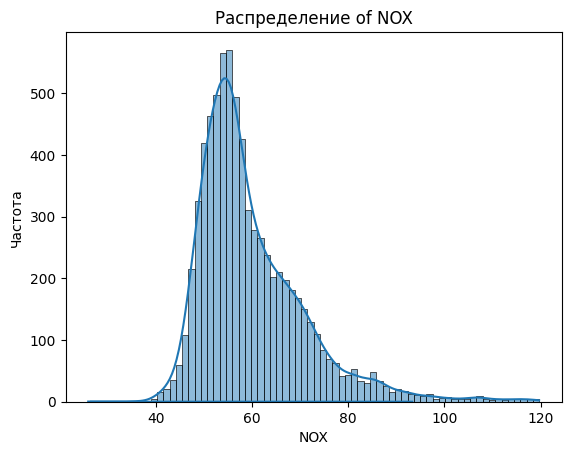

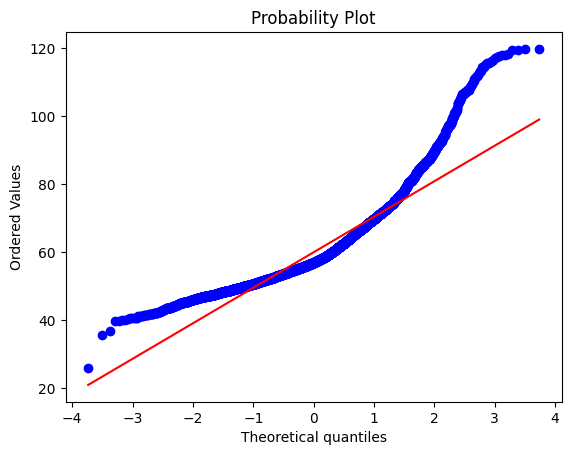

In [29]:
from matplotlib import pyplot as plt
from scipy import stats

for col in df1.columns:

    sns.histplot(df1[col], kde=True)

    (mu, sigma) = stats.norm.fit(df1[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    print('{}: Skewness: {:.2f}'.format(col, df1[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, df1[col].kurt()))

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.title('Распределение of {}'.format(col))

    fig = plt.figure()
    stats.probplot(df1[col], plot=plt)

    plt.show()




In [23]:
df1.isna().sum()

,0
AT,0
AP,0
AH,0
AFDP,0
GTEP,0
TIT,0
TAT,0
TEY,0
CDP,0
CO,0


In [24]:
for column in df1.columns:
    dist_values = len(df1[column].unique())
    print(f"{column}: {dist_values} distinct values")

AT: 6662 distinct values
AP: 440 distinct values
AH: 6819 distinct values
AFDP: 6194 distinct values
GTEP: 5726 distinct values
TIT: 730 distinct values
TAT: 1583 distinct values
TEY: 3640 distinct values
CDP: 3129 distinct values
CO: 6796 distinct values
NOX: 6540 distinct values


In [30]:
df1.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
AT,7384.000000,17.225259,8.095783,-6.234800,11.073250,17.456500,23.684750,37.103000
AP,7384.000000,1014.509110,6.895430,989.400000,1009.675000,1014.000000,1018.300000,1036.600000
AH,7384.000000,68.647464,13.541116,24.085000,59.447250,70.952000,79.653750,96.666000
AFDP,7384.000000,3.598909,0.610226,2.368800,3.117300,3.538500,4.194825,5.239500
GTEP,7384.000000,26.130149,4.473737,17.698000,23.147000,25.331000,30.018250,40.716000
TIT,7384.000000,1078.974689,19.762449,1016.000000,1070.500000,1080.300000,1099.900000,1100.400000
TAT,7384.000000,546.642484,5.489066,516.040000,544.747500,549.720000,550.030000,550.590000
TEY,7384.000000,133.993380,16.179208,100.020000,126.255000,131.600000,147.160000,179.500000
CDP,7384.000000,12.097025,1.136601,9.870800,11.465750,11.933000,13.148000,15.159000
CO,7384.000000,3.129986,2.234962,0.212800,1.808175,2.533400,3.702550,41.097000


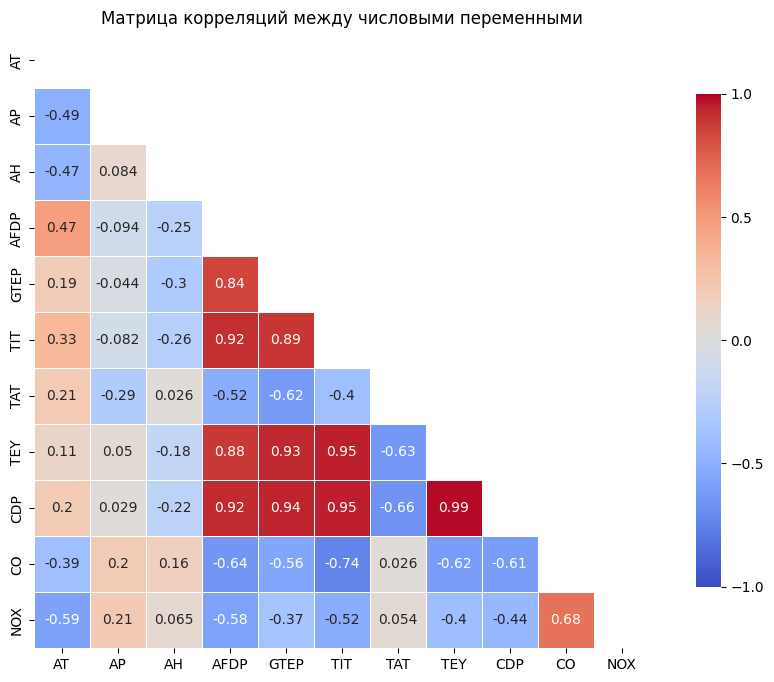

In [31]:
correlation_matrix = df1.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Выбросов и пропущенных значений не наблюдаем, фидим существенную корреляцию между отдельными признаками (более 0,9)

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

Признаки AFDP, GTEP, TIT, TEY, CDP взаимно коррелированы друг с другом, зависят от параметров турбины и являются производными от признака TAY - энергоотдачи турбины. С ними в меньшей степени коррелирован признак TAT - температура на выходе из турбины. Третьим параметром выберем показатель внешней среды - AT - температура окружающей среды. По этим трем признакам построим 3d график.

In [40]:
fig = px.scatter_3d(df1, x='TEY', y='TAT', z='AT')
fig.show()

Видим, что до значения показателя TEY = 140 и после данные ведут себя по-разному - показатель TAT сначала растет с ростом показателя TEY (но только при значении AT < 18.0, в противном случае - практически не меняется), затем начинает снижаться после преодаления данного порога показателем TEY (выше 140.0). Выделяем в связи с этим первоначально 3 кластера данных

Визуализируем предполагаемое разделение на кластеры

In [41]:
def clast(row):
  if row['TEY'] > 140.0:
    return 1
  elif (row['TEY'] <= 140.0)&(row['AT'] <= 18.0):
    return 2
  else:
    return 3

In [42]:

df1['cl'] = df1.apply(clast, axis=1)

In [43]:
fig = px.scatter_3d(df1, x='TEY', y='TAT', z='AT', color = 'cl')
fig.show()

Удаляем созданный столбец 'cl'

In [45]:
df1 = df1.drop('cl', axis=1)

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

Используем StandartScaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_scaled.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436


In [54]:
from sklearn.cluster import DBSCAN




In [116]:
model = DBSCAN(eps=0.8, min_samples=8)
model.fit(df_scaled)
df1['labels'] = model.labels_
silhouette_score(df_scaled, df1['labels'])


0.05676012667467741

In [91]:
df_scaled['labels'].value_counts()


,count
labels,
0,6318
-1,850
9,35
14,24
4,21
11,18
6,17
1,15
2,13


# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

Кластеризация с помощью DBSCAN дает плохой (близкий к 0) показатель Silhouette.

Модель K-means  с количеством кластером = 3 дает лучший результат в нашем случае:

In [133]:
km1 = KMeans(n_clusters=3, random_state=42).fit(df_scaled)



In [134]:
silhouette_score(df_scaled, km1.labels_, metric='euclidean')

0.3381332227044546